In [163]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

#merged_data = pd.merge(clinical_data, mouse_data, on="Mouse ID", how="left", indicator=True )

merged_data = pd.merge(clinical_data, mouse_data, on="Mouse ID", how="left" )

# for some reason this gives me more data than I think I should get, but it gives
# the same output as the example provided 

# Display the data table for preview

#merged_data.to_csv("data/merged_data.csv")
#clinical_data.count
#mouse_data["Mouse ID"].isin(clinical_data["Mouse ID"]).value_counts()
#clinical_data["Mouse ID"].value_counts()

#print(f"Matching Keys: {clinical_data["Mouse ID"].isin(mouse_data["Mouse ID"]).value_counts()}")
#print(f"Merged: {merged_data.shape}")
#print(f"Clinical: {clinical_data.shape}")
#print(f"Mouse: {mouse_data.shape}")

#clinical_data["Mouse ID"].isin(mouse_data["Mouse ID"]).value_counts()
#mouse_data["Mouse ID"].isin(clinical_data["Mouse ID"]).value_counts()

#print(f"Merged diff: {merged_data["_merge"] == "both"}")
#print(f"Merged diff: {len(merged_data['_merge'] != 'both')}")

merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [164]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = merged_data.groupby(["Drug","Timepoint"]).mean().reset_index()
mean_tumor = mean_tumor[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Convert to DataFrame

mean_tumor_df = pd.DataFrame(mean_tumor)

# Preview DataFrame

mean_tumor_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [165]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

means_se = merged_data.groupby(['Drug','Timepoint']).sem().reset_index()

# Convert to DataFrame

means_se_df = means_se[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Preview DataFrame

means_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [166]:
# Minor Data Munging to Re-Format the Data Frames
mmunge = mean_tumor_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
mmunge

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


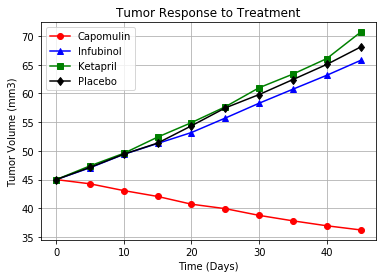

In [167]:
# Generate the Plot (with Error Bars)
mmunge_df = mmunge.reset_index()
x_axis = mmunge_df["Timepoint"]
capo = mmunge_df["Capomulin"]
infu = mmunge_df["Infubinol"]
keta = mmunge_df["Ketapril"]
plac = mmunge_df["Placebo"]


capo_handle, = plt.plot(x_axis, capo, marker ='o', color='red', label="Capomulin")
infu_handle, = plt.plot(x_axis, infu, marker='^', color='blue', label="Infubinol")
keta_handle, = plt.plot(x_axis, keta, marker='s', color='Green', label="Ketapril")
plac_handle, = plt.plot(x_axis, plac, marker='d', color='black', label="Placebo")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.grid()

#mmunge_df.head()
# Save the Figure
plt.savefig("../Images/lineConfig.png")

In [168]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [169]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_meta = merged_data[["Drug", "Timepoint", "Metastatic Sites"]]
mean_meta = mean_meta.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

mean_meta_df = pd.DataFrame(mean_meta)

# Preview DataFrame
mean_meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [170]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint

meta_sem = merged_data[["Drug", "Timepoint", "Metastatic Sites"]]
meta_sem = meta_sem.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame

meta_sem_df = pd.DataFrame(meta_sem)

# Preview DataFrame

meta_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [171]:
# Minor Data Munging to Re-Format the Data Frames
mmunge2 = {}
mmunge2 = merged_data[["Drug","Timepoint","Metastatic Sites"]]
mmunge2 = mmunge2.groupby(["Drug","Timepoint"]).mean().reset_index()

mmunge2 = pd.DataFrame(mmunge2)

mmunge2 = mmunge2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

#mmunge2 = mmunge2.reset_index().set_index("Timepoint")
#mmunge2 = mmunge2.reset_index()
#mmunge2 = mmunge2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

mmunge2


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


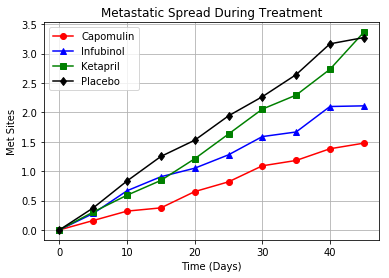

In [172]:
# Generate the Plot (with Error Bars)
mmunge2 = mmunge2.reset_index()

x_axis2 = mmunge2["Timepoint"]
capo2 = mmunge2["Capomulin"]
infu2 = mmunge2["Infubinol"]
keta2 = mmunge2["Ketapril"]
plac2 = mmunge2["Placebo"]

capo_handle2, = plt.plot(x_axis2, capo2, marker ='o', color='red', label="Capomulin")
infu_handle2, = plt.plot(x_axis2, infu2, marker='^', color='blue', label="Infubinol")
keta_handle2, = plt.plot(x_axis2, keta2, marker='s', color='Green', label="Ketapril")
plac_handle2, = plt.plot(x_axis2, plac2, marker='d', color='black', label="Placebo")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met Sites")
plt.legend(loc="upper left")
plt.grid()

#mmunge_df.head()
# Save the Figure
plt.savefig("../Images/lineConfig2.png")

plt.show()


## Survival Rates

In [173]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

survival = {}
survival = merged_data[["Drug","Timepoint","Mouse ID"]]
survival = survival.rename(columns={"Mouse ID" : "Mouse Count"})


# Convert to DataFrame

#means_se_df = means_se[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Preview DataFrame

survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,b128
1,Ketapril,0,f932
2,Ketapril,0,g107
3,Ketapril,0,a457
4,Ketapril,0,c819


In [174]:
# Minor Data Munging to Re-Format the Data Frames

mmunge3 = {}
mmunge3 = merged_data[["Drug","Timepoint","Mouse ID"]]

mmunge3 = mmunge3.rename(columns={"Mouse ID" : "Mouse Count"})
mmunge3 = mmunge3.groupby(['Drug','Timepoint']).count().reset_index()

#mmunge3 = mmunge3.groupby(["Drug","Timepoint"]).mean().reset_index()

# mmunge3 = pd.DataFrame(mmunge2)

mmunge3 = mmunge3.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked

mmunge3


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


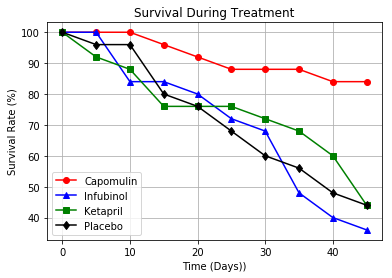

In [178]:
# Generate the Plot (with Error Bars)
mmunge3 = mmunge3.reset_index()

x_axis3 = mmunge3["Timepoint"]
capo3 = (mmunge3["Capomulin"] / mmunge3["Capomulin"][0]) * 100
infu3 = (mmunge3["Infubinol"] / mmunge3["Infubinol"][0]) * 100
keta3 = (mmunge3["Ketapril"] / mmunge3["Ketapril"][0]) * 100
plac3 = (mmunge3["Placebo"] / mmunge3["Placebo"][0]) * 100

capo_handle3, = plt.plot(x_axis3, capo3, marker ='o', color='red', label="Capomulin")
infu_handle3, = plt.plot(x_axis3, infu3, marker='^', color='blue', label="Infubinol")
keta_handle3, = plt.plot(x_axis3, keta3, marker='s', color='Green', label="Ketapril")
plac_handle3, = plt.plot(x_axis3, plac3, marker='d', color='black', label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days))")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.grid()

# #mmunge_df.head()
# # Save the Figure
plt.savefig("../Images/lineConfig3.png")

plt.show()

# mmunge3["Capomulin"][0]
# capo3

## Summary Bar Graph

In [213]:
# Calculate the percent changes for each drug
changes = {}

i=0
for cols in mmunge.columns:
    changes[cols] = (round(100*(mmunge.iloc[-1, i ] / mmunge.iloc[0, i] - 1),6))
    i = i +1
# Display the data to confirm

changes

{'Capomulin': -19.475303,
 'Ceftamin': 42.516492,
 'Infubinol': 46.123472,
 'Ketapril': 57.028795,
 'Naftisol': 53.923347,
 'Placebo': 51.29796,
 'Propriva': 47.241175,
 'Ramicane': -22.3209,
 'Stelasyn': 52.085134,
 'Zoniferol': 46.579751}

No handles with labels found to put in legend.


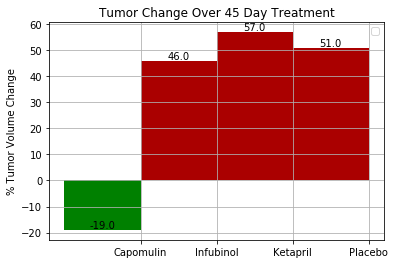

<Figure size 432x288 with 0 Axes>

In [232]:
# Store all Relevant Percent Changes into a Tuple
#tuple_percent = ()
#tuple_percent(changes["Capomulin"],changes["Infubinol"],changes["Ketapril"],changes["Placebo"])

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls

labels = ["Capomulin","Infubinol","Ketapril","Placebo"]
drug_vals = [round(changes["Capomulin"]),round(changes["Infubinol"]),round(changes["Ketapril"]),round(changes["Placebo"])]


x = np.arange(len(labels))  # the label locations
#width = 0.35  # the width of the bars
width = 1  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, drug_vals, width)
rects1 = ax.bar(x - width/2, drug_vals, width, color=['#AA0000' if row > 0.0 else '#008000' for row in volchange])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid()



def addlabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


addlabel(rects1)

#fig.tight_layout()

plt.show()

plt.savefig("../Images/lineConfig4.png")

fig.show()